## Numpy

In [2]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [3]:

import random
import time






In [14]:
%%timeit
tab = [random.random() +1 for i in range(0,10000)]

1.33 ms ± 60.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [17]:
%%timeit
tab1 = np.random.rand(10000)
tab1 = tab1 + 1


73.9 µs ± 922 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [18]:
from math import sin, cos

In [25]:
%%timeit
tab =[ sin(x) + cos(x) for x in [random.random() for i in range(0,10000)]]

3.34 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
%%timeit
tab1 = np.random.rand(10000)
np.sin(tab1) + np.cos(tab1)

195 µs ± 3.92 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [61]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

In [80]:
def cube_sum1(x):
    """Zwraca sume szescianow elementow"""
    return np.sum(np.power(x,3))

def almost_variance1(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    mean = np.mean(x)
    return np.mean(np.power(x-mean,4))




In [99]:
x=[random.random() for i in range(0,20000)]
x=np.array(x)


In [100]:
%%timeit
cube_sum(x)

5.19 ms ± 346 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [101]:
%%timeit
almost_variance(x)

9.05 ms ± 474 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [102]:
%%timeit
cube_sum1(x)

663 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [103]:
%%timeit
almost_variance1(x)

866 µs ± 76.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [104]:
print(almost_variance(x))
print(almost_variance1(x))

0.01251395517400706
0.012513955174007057


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [108]:
np.arange(1,11).reshape(10,1) * np.arange(1,11)

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [141]:

x = np.random.rand(50).reshape(10,5)
differences =x[:,np.newaxis,:]-x[np.newaxis,:,:]
np.linalg.norm(differences,axis=-1)



array([[0.        , 1.08297276, 0.7168219 , 0.55017724, 0.94251402,
        1.12357939, 0.96209315, 0.58861944, 0.85343577, 1.15854874],
       [1.08297276, 0.        , 0.50256516, 1.04161646, 1.1124712 ,
        1.09859445, 0.97318513, 1.05298098, 1.23248186, 1.10247164],
       [0.7168219 , 0.50256516, 0.        , 0.81198284, 0.80205783,
        0.80578802, 0.68504493, 0.76560053, 0.94972496, 1.11316629],
       [0.55017724, 1.04161646, 0.81198284, 0.        , 1.22347648,
        1.15974833, 1.03420389, 0.33340842, 0.56580106, 0.80239569],
       [0.94251402, 1.1124712 , 0.80205783, 1.22347648, 0.        ,
        0.81834279, 1.17097273, 1.15492883, 1.21762044, 1.51866924],
       [1.12357939, 1.09859445, 0.80578802, 1.15974833, 0.81834279,
        0.        , 0.71844221, 1.17822397, 0.83927654, 1.15119693],
       [0.96209315, 0.97318513, 0.68504493, 1.03420389, 1.17097273,
        0.71844221, 0.        , 1.11340859, 0.9059233 , 1.07745906],
       [0.58861944, 1.05298098, 0.7656005

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [39]:
X=np.linspace(0,9,num=10).reshape(5,2)

def white(X):
    return (X-np.mean(X,axis=0))/np.std(X,axis=0)
print(white(X))


[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]


### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [49]:
#index(mix)
X=np.linspace(0,9,num=10).reshape(5,2)

def closest(x,A):
    index= np.argmin(np.abs(A-x))
    return A.flatten()[index]
x=12
print(closest(x,X))


9.0


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [61]:
a= np.linspace(10,1,num=10)
x=2
#wersja czytelna
def poly(x,a):
    xlist=[1]+[x]*(len(a)-1)
    xlist=np.cumprod(xlist)
    return sum(a*xlist)

#jednolinijkowo:
def poly1(x,a):
    return sum(a*np.cumprod([1]+[x]*(len(a)-1)))

print(poly1(x,a))

2036.0


## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

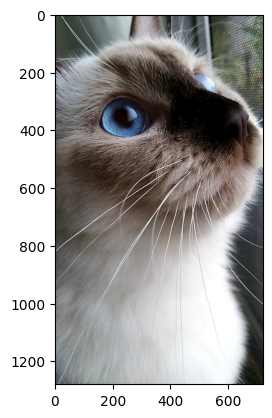

In [64]:
img = mpimg.imread('catto.jpg')
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

56
11


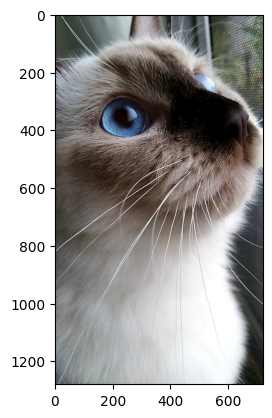

In [138]:
print(img[0][0][0])
def process_image(img):
    np.multiply(img[:][:][0],0.2126,out=img[::][::][0], casting='unsafe')
    img[:][:][1]=img[:][:][1]* 0.7152
    img[:][:][2]=img[:][:][2] * 0.0722
    return img

out = process_image(np.copy(img))
print(out[0][0][0])
plt.imshow(out);

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [136]:
x1=[1,1]
x2=[5,10]
def interpolate(x1,x2):
    l=np.linspace(0,1,11)
    return np.multiply(np.expand_dims(l,axis=1),x1)+np.multiply(np.expand_dims(1-l,axis=1),x2)
print(interpolate(x1,x2))

[[ 5.  10. ]
 [ 4.6  9.1]
 [ 4.2  8.2]
 [ 3.8  7.3]
 [ 3.4  6.4]
 [ 3.   5.5]
 [ 2.6  4.6]
 [ 2.2  3.7]
 [ 1.8  2.8]
 [ 1.4  1.9]
 [ 1.   1. ]]
